# **GRADED ASSIGNMENT 2**

This is a programming task dedicated to the method of least squares.

First, make your own copy of the notebook (*File $\rightarrow$ Save a copy in Drive*) or download the notebook to your machine if you prefer to work locally (*File $\rightarrow$ Download*).

Then, implement your solutions to the tasks formulated in the notebook. You can add **code cells** to write some code and **text cells** in case you want to include additional explanations to your answers in plain English.

Finally, save your notebook as a .pdf file and attach it to the submission form. **Make sure that all the cells are executed and all relevant outputs are being printed out**.


In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## **Loading the data**

<img src="https://thumbor.forbes.com/thumbor/fit-in/960x/https://www.forbes.com/wheels/wp-content/uploads/2020/08/dealer-lot-copy.jpg" width="400">

In this part of the assignment, you will be working with a toy dataset that contains infromation about ages and prices of 25 cars. Run the cell below to load the data in memory:

In [4]:
age = np.array([ 6., 26., 14., 38., 20., 31., 10.,  7.,  9.,  7., 5., 16., 20.,
                 33., 37., 26., 37., 42.,  3.,  1.,  4., 2., 31., 39., 44.])

price = np.array([19000.,  5500., 24500., 32000.,  7500., 12500., 24000., 46500.,
                  20000., 46500., 67500.,  3000., 17000., 30000., 38500.,  3500.,
                  38500.,  60000., 36000., 93500., 22500., 38500., 12500., 37500.,
                  74500.])

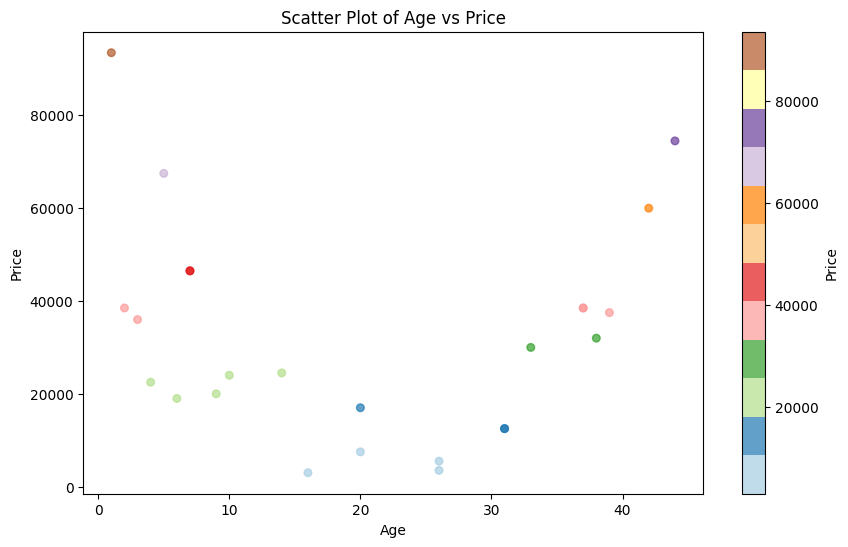

In [5]:
# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(age, price, c=price, s=30, cmap=plt.cm.Paired, alpha=0.7)

# Add color bar
plt.colorbar(scatter, label='Price')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Scatter Plot of Age vs Price')

# Show plot
plt.show()

## **Task 1: A simple model** *(2 points)*

Imagine that you need to predict car's price based on its age. To that end, as a strating point, you decide to model the relationship between the two as a linear function:

$$car\_price = w_0 + w_1 \cdot car\_age$$

*(1 point)* **Fit a straight line to the data available using the method of least squares. What are the optimal values for the model coefficients $w_0$ and $w_0$ that you have obtained?**

<font color='red'>Do **not** use any readily-available implementation of the linear regression model. Instead, implement your own solution based on what we have derived during exercise session 3.</font>

### Step1: Formulated the problem
Given a dataset of \( n \) points, where \( x_i \) is the car age and \( y_i \) is the car price, we want to minimize the following objective function:

$$S(w_0, w_1) = \sum_{i=1}^{n} (y_i - (w_0 + w_1 x_i))^2$$



In [6]:
# TODO: your code here
def fit_linear_regression(age, price):
    n = len(age)
    
    # Calculate the necessary sums
    sum_x = np.sum(age)
    sum_y = np.sum(price)
    sum_xy = np.sum(age * price)
    sum_x_squared = np.sum(age ** 2)
    
    # Calculate w1 (slope)
    w1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    
    # Calculate w0 (intercept)
    w0 = (sum_y - w1 * sum_x) / n
    
    return w0, w1


In [7]:
# Fit the model
w0, w1 = fit_linear_regression(age, price)
print(f"Optimal w0 (intercept): {w0}")
print(f"Optimal w1 (slope): {w1}")

Optimal w0 (intercept): 33976.48378028365
Optimal w1 (slope): -75.61435926592755


In [8]:
#let's make a check via sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = age.reshape(-1, 1)
y = price
model.fit(x, price)
print(f"(intercept) {model.intercept_}")
print(f"(slope) {model.coef_[0]}")

(intercept) 33976.48378028365
(slope) -75.61435926592755


In [9]:
predicted_prices = w0 + w1 * age

*(1 point)* **Make a plot that would visualize the original data, as well as the predictions obtained by your model.**

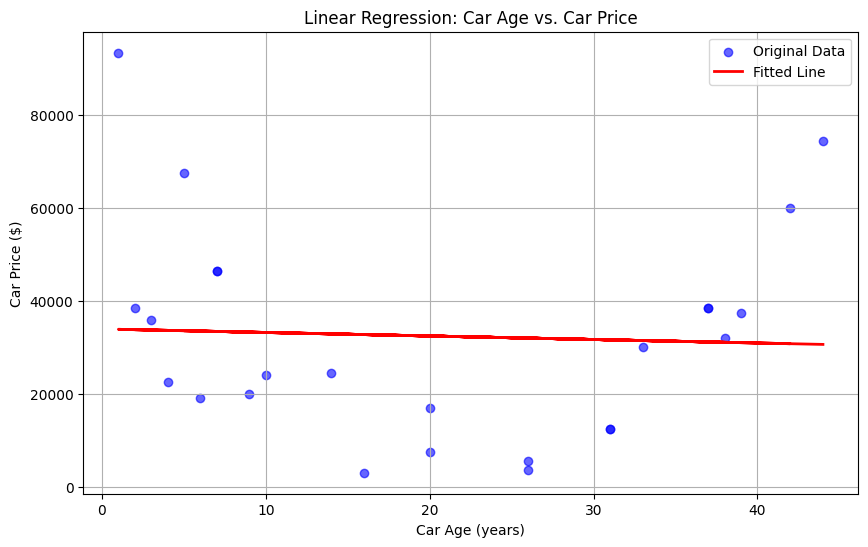

In [10]:
# TODO: your code here
# Create scatter plot of the original data
plt.figure(figsize=(10, 6))
plt.scatter(age, price, color='blue', label='Original Data', alpha=0.6)

# Plot the regression line
plt.plot(age, predicted_prices, color='red', label='Fitted Line', linewidth=2)

# Add labels and title
plt.xlabel('Car Age (years)')
plt.ylabel('Car Price ($)')
plt.title('Linear Regression: Car Age vs. Car Price')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## **Task 2: Improving the fit** *(2 points)*

From the visualization you have obtained above, you can notice that the nature of the relationship between car age and its price is not linear. Indeed, both very new and very old cars can be expensive, while moderately old cars are generally cheaper. Thus, car price can be better modelled as a *quadratic* function of its age:

$$car\_price = w_0 + w_1 \cdot car\_age + w_2 \cdot car\_age^2$$

*(2 points)* **Explain how you can use the method of least squares to fit such
a quadratic curve to the data. Implement your solution and report the optimal values of the model coefficients $w_0, w_1$ and $w_2$**.

*TODO: short explanation here*
I should create a new feature 'age^2' that represents the square of `age`. This will allow us to fit a polynomial equation of the form:
$$car\_price = w_0 + w_1 \cdot car\_age + w_2 \cdot car\_age^2$$
after I will compute the optimal coefficients using the least squares method
$$w = np.linalg.inv(X.T @ X) @ X.T @ y$$


In [43]:
# TODO: your code here
# Step 1: Create the features for the design matrix
import copy
car_age = copy.deepcopy(age)
car_age = car_age.reshape(-1, 1)
car_price = copy.deepcopy(price)

X = np.column_stack((np.ones(len(car_age)), car_age, car_age**2))  # Add a column of ones for w_0
y = car_price

X.shape, age.shape, y.shape

((25, 3), (25,), (25,))

In [44]:
# Compute the optimal coefficients using the least squares method
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [45]:
# Output the optimal values of w_0, w_1, and w_2
w_0, w_1, w_2 = w
print(f"Optimal coefficients:\nw_0: {w_0}\nw_1: {w_1}\nw_2: {w_2}")

Optimal coefficients:
w_0: 67864.16676264744
w_1: -5679.308997156368
w_2: 129.93792575313512


*(1 point)* **Make a plot that would visualize the original data, as well as the predictions obtained by the updated model.**

In [58]:
predicted_prices_update = w_0 + w_1 * car_age + w_2 * car_age**2

In [77]:
predicted_prices_update[:, 0]

array([38466.07810682,  8040.1706457 , 13821.67425007, 39680.78965823,
        6253.15712077, 16675.93449956, 24064.8693664 , 34475.96214446,
       27275.35777424, 34475.96214446, 42716.06992069, 10259.33180095,
        6253.15712077, 21949.37100165, 35614.7542239 ,  8040.1706457 ,
       35614.7542239 , 58543.68991061, 51995.68110296, 62314.79569124,
       47225.93758607, 57025.30047135, 16675.93449956, 44006.70094407,
       69534.39514584])

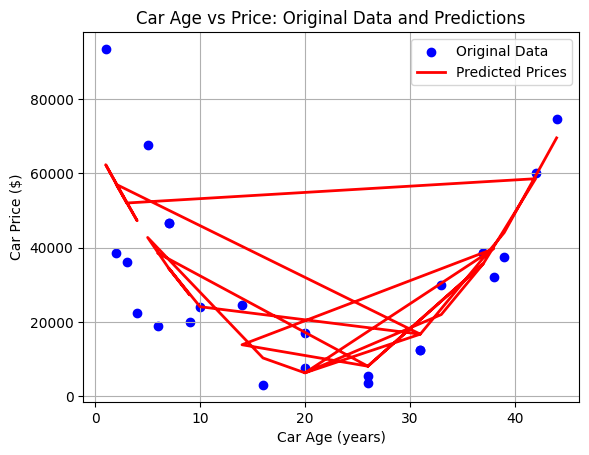

In [87]:
# TODO: your code here
# Plotting the original data points
plt.scatter(car_age, car_price, color='blue', label='Original Data', marker='o')

# Plotting the predictions from the updated model
plt.plot(np.sort(car_age), predicted_prices_update, color='red', label='Predicted Prices', linewidth=2)

# Adding labels and title
plt.xlabel('Car Age (years)')
plt.ylabel('Car Price ($)')
plt.title('Car Age vs Price: Original Data and Predictions')
plt.legend()
plt.grid()

# Show the plot
plt.show()

I didn't get a very good drawing, it probably has something to do with the big age step**2

In [94]:
np.std(age**2)

np.float64(630.2245390335099)

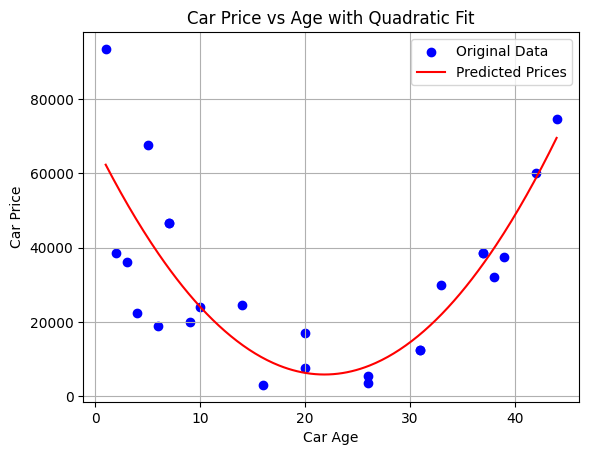

In [96]:
# Creating a more dense set of values for age
age_smooth = np.linspace(min(age), max(age), 300)  # 300 points between the minimum and maximum age value
predicted_prices_smooth = w_0 + w_1 * age_smooth + w_2 * age_smooth**2 # Calculate prices for these age values

# Построение графика
plt.scatter(age, price, color='blue', label='Original Data') 
plt.plot(age_smooth, predicted_prices_smooth, color='red', label='Predicted Prices')  #Smooth curve
plt.xlabel('Car Age')
plt.ylabel('Car Price')
plt.title('Car Price vs Age with Quadratic Fit')
plt.legend()
plt.grid()
plt.show()

## **Task 3: Least Squares via $QR$ factorization** *(6 points)*

Solving $Xw = y$ using the method of least squares the way we have derived during the exercise session involves constructing the pseudo-inverse of the input data matrix $X$, which can be computationally expensive when $X$ is large.

A trick often used in practice is to decompose $X$ into a product of two matrices, $X = QR$, such that $Q$ is an *orthogonal* matrix, where column vectors are orthogonal  to each other and have unit lengths, and $R$ is an *upper-triangular* matrix.

Replacing $X$ by the product of $Q$ and $R$ significantly simplifies and speeds up computing the unknown $w$ due to the special properties of these matrices.

**Your task is to fit a simple model $car\_price = w_0 + w_1 \cdot car\_age$ from Task 1 once again, but this time estmating the unknown coefficients using the $QR$ factorization.**

**First, watch the following videos to learn more about $QR$-factorization and how it is used to solve least squares problems in the following videos:**
- [An Example of QR Factorization](https://youtu.be/VsyNkUo88NM)
- [Using QR Factorization to Solve Least-Squares Problems](https://youtu.be/-QY5iwNr9I4)

**When you are done, proceed with the tasks below.**


*(1 point)* **Is it possible to perform the $QR$-factorization of the matrix $X$? Answer this question by checking if columns of $X$ are linearly independent. Explain.**

*Hint: you can use [$\texttt{np.linalg.matrix_rank()}$](https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_rank.html) function to quickly compute rank of a matrix.*



In [16]:
# TODO: your code here

**Now, perform the $QR$-decomposition of $X$ following the steps below.**

<font color='red'>Do **not** use any readily-available implementation of the $QR$-factorization. Instead, implement your own solution from scratch based on the tutorials provided above.</font>

*(1 point)* **First, construct matrix $Q$ and print it out.**

In [17]:
# TODO: your code here

*(0.5 points)* **Verify that $Q$ is indeed orthogonal by showing that $Q^{-1} = Q^T$ (or, equivalently, that $Q^TQ = E$).**

In [18]:
# TODO: your code here

*(1 point)* **Second, construct matrix $R$. Print it out and verify that it is indeed an upper-triangular matrix.**

In [19]:
# TODO: your code here

*(0.5 point)* **Verify that $X = QR$**.

In [20]:
# TODO: your code here

*(2 point)* **Finally, perform least squares via $QR$ factorization. To do so, express $w$ in terms of $Q, R$ and $y$ and compute its value.**

**Compare the coefficients that you get to those obtained in the previous tasks.**

In [21]:
# TODO: your code here